In [154]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [155]:
df=pd.read_csv("titanic_dataset_alive_ded.csv")

In [156]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [157]:
surv=df[df.Survived==1]

In [158]:
surv.shape

(152, 12)

In [159]:
ded=df[df.Survived==0]

In [160]:
ded.shape

(266, 12)

<Axes: xlabel='Survived', ylabel='count'>

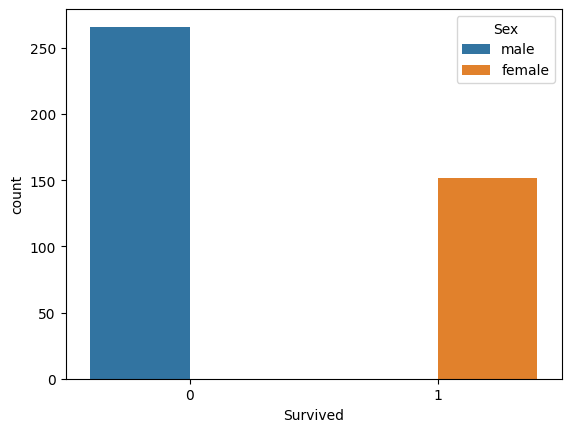

In [161]:
sns.countplot(data=df,x='Survived', hue='Sex')

In [162]:
gk=df.drop(['Name','Sex','Embarked','Ticket','Cabin'],axis=1)

In [163]:
gk

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,892,0,3,34.5,0,0,7.8292
1,893,1,3,47.0,1,0,7.0000
2,894,0,2,62.0,0,0,9.6875
3,895,0,3,27.0,0,0,8.6625
4,896,1,3,22.0,1,1,12.2875
...,...,...,...,...,...,...,...
413,1305,0,3,NaN,0,0,8.0500
414,1306,1,1,39.0,0,0,108.9000
415,1307,0,3,38.5,0,0,7.2500
416,1308,0,3,NaN,0,0,8.0500


In [164]:
gk.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,1102.620301,2.334586,30.272732,0.379699,0.274436,27.527877
1,1096.789474,2.144737,30.272362,0.565789,0.598684,49.747699


<Axes: xlabel='Sex'>

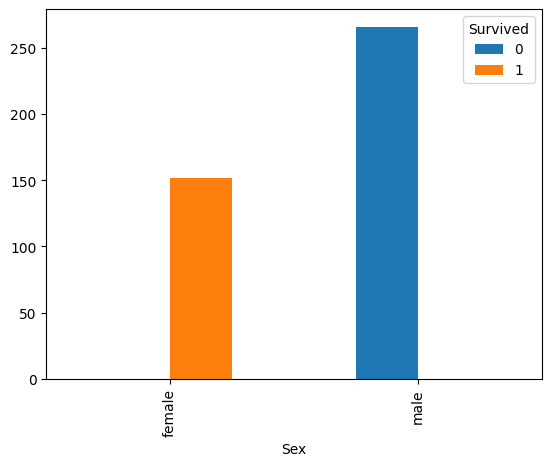

In [165]:
pd.crosstab(df.Sex,df.Survived).plot(kind='bar')

<Axes: xlabel='Survived', ylabel='Fare'>

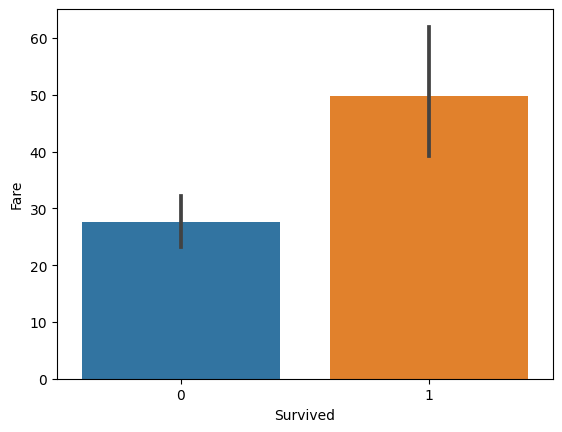

In [166]:
sns.barplot(data=df, x='Survived', y='Fare')

In [167]:
df['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='Embarked'>

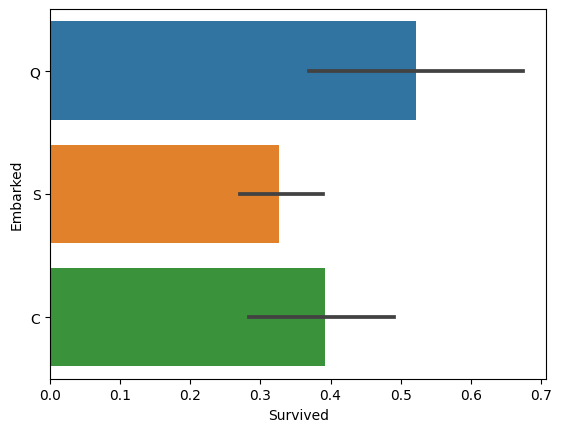

In [168]:
sns.barplot(data=df, x='Survived', y='Embarked')

<Axes: xlabel='Embarked'>

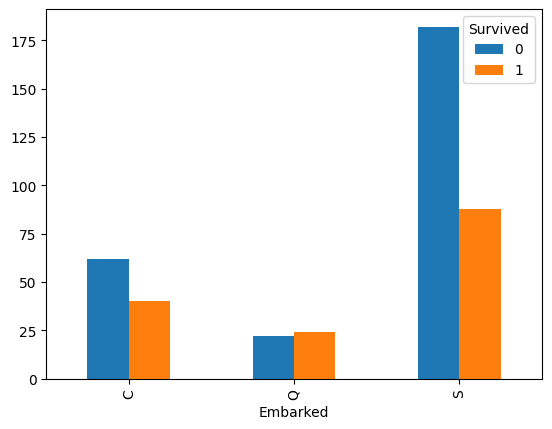

In [169]:
pd.crosstab(df.Embarked,df.Survived).plot(kind='bar')

In [170]:
subdf=df[['PassengerId','Age','Ticket','Fare','Embarked','Sex']]

In [171]:
subdf.head()

,PassengerId,Age,Ticket,Fare,Embarked,Sex
0,892,34.5,330911,7.8292,Q,male
1,893,47.0,363272,7.0000,S,female
2,894,62.0,240276,9.6875,Q,male
3,895,27.0,315154,8.6625,S,male
4,896,22.0,3101298,12.2875,S,female


In [172]:
sex_dummies=pd.get_dummies(subdf['Sex'],dtype=int,prefix="sex")

In [173]:
df_with_dummies= pd.concat([subdf,sex_dummies],axis='columns')
df_with_dummies.head()

,PassengerId,Age,Ticket,Fare,Embarked,Sex,sex_female,sex_male
0,892,34.5,330911,7.8292,Q,male,0,1
1,893,47.0,363272,7.0000,S,female,1,0
2,894,62.0,240276,9.6875,Q,male,0,1
3,895,27.0,315154,8.6625,S,male,0,1
4,896,22.0,3101298,12.2875,S,female,1,0


In [174]:
x=df_with_dummies
x.head()

,PassengerId,Age,Ticket,Fare,Embarked,Sex,sex_female,sex_male
0,892,34.5,330911,7.8292,Q,male,0,1
1,893,47.0,363272,7.0000,S,female,1,0
2,894,62.0,240276,9.6875,Q,male,0,1
3,895,27.0,315154,8.6625,S,male,0,1
4,896,22.0,3101298,12.2875,S,female,1,0


In [175]:
y=df.Survived

In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [177]:
X_train

,PassengerId,Age,Ticket,Fare,Embarked,Sex,sex_female,sex_male
240,1132,55.0,112377,27.7208,C,female,1,0
286,1178,NaN,SOTON/O.Q. 3101314,7.2500,S,male,0,1
109,1001,18.5,248734,13.0000,S,male,0,1
173,1065,NaN,2673,7.2292,C,male,0,1
143,1035,28.0,244358,26.0000,S,male,0,1
...,...,...,...,...,...,...,...,...
112,1004,36.0,PC 17531,31.6792,C,female,1,0
314,1206,55.0,PC 17760,135.6333,C,female,1,0
335,1227,30.0,110469,26.0000,S,male,0,1
261,1153,21.0,350410,7.8542,S,male,0,1


In [178]:
from sklearn.linear_model import LogisticRegression

In [179]:
model=LogisticRegression()

In [180]:
df_with_dummies=df_with_dummies.drop(['Embarked','Ticket'],axis=1)

In [181]:
x=df_with_dummies
x.head()

,PassengerId,Age,Fare,Sex,sex_female,sex_male
0,892,34.5,7.8292,male,0,1
1,893,47.0,7.0000,female,1,0
2,894,62.0,9.6875,male,0,1
3,895,27.0,8.6625,male,0,1
4,896,22.0,12.2875,female,1,0


In [182]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Age          332 non-null    float64
 2   Fare         417 non-null    float64
 3   Sex          418 non-null    object 
 4   sex_female   418 non-null    int32  
 5   sex_male     418 non-null    int32  
dtypes: float64(2), int32(2), int64(1), object(1)
memory usage: 16.5+ KB


In [183]:
X_train

,PassengerId,Age,Ticket,Fare,Embarked,Sex,sex_female,sex_male
240,1132,55.0,112377,27.7208,C,female,1,0
286,1178,NaN,SOTON/O.Q. 3101314,7.2500,S,male,0,1
109,1001,18.5,248734,13.0000,S,male,0,1
173,1065,NaN,2673,7.2292,C,male,0,1
143,1035,28.0,244358,26.0000,S,male,0,1
...,...,...,...,...,...,...,...,...
112,1004,36.0,PC 17531,31.6792,C,female,1,0
314,1206,55.0,PC 17760,135.6333,C,female,1,0
335,1227,30.0,110469,26.0000,S,male,0,1
261,1153,21.0,350410,7.8542,S,male,0,1


In [184]:
X_train.isnull().sum()

PassengerId     0
Age            52
Ticket          0
Fare            1
Embarked        0
Sex             0
sex_female      0
sex_male        0
dtype: int64

In [185]:
X_train['Age'].fillna(25, inplace=True)

In [186]:
X_train['Fare'].fillna(method ='ffill', limit = 1, inplace = True)

In [187]:
X_train.isnull().sum()

PassengerId    0
Age            0
Ticket         0
Fare           0
Embarked       0
Sex            0
sex_female     0
sex_male       0
dtype: int64

In [188]:
x.isnull().sum()

PassengerId     0
Age            86
Fare            1
Sex             0
sex_female      0
sex_male        0
dtype: int64

In [189]:
x['Age'].fillna(25, inplace=True)

In [190]:
x['Fare'].fillna(method ='ffill', limit = 1, inplace = True)

In [191]:
x.isnull().sum()

PassengerId    0
Age            0
Fare           0
Sex            0
sex_female     0
sex_male       0
dtype: int64

In [193]:
x

,PassengerId,Age,Fare,Sex,sex_female,sex_male
0,892,34.5,7.8292,male,0,1
1,893,47.0,7.0000,female,1,0
2,894,62.0,9.6875,male,0,1
3,895,27.0,8.6625,male,0,1
4,896,22.0,12.2875,female,1,0
...,...,...,...,...,...,...
413,1305,25.0,8.0500,male,0,1
414,1306,39.0,108.9000,female,1,0
415,1307,38.5,7.2500,male,0,1
416,1308,25.0,8.0500,male,0,1


In [208]:
x=x.drop(['Sex'],axis=1)

In [212]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [211]:
x

,PassengerId,Age,Fare,sex_female,sex_male
0,892,34.5,7.8292,0,1
1,893,47.0,7.0000,1,0
2,894,62.0,9.6875,0,1
3,895,27.0,8.6625,0,1
4,896,22.0,12.2875,1,0
...,...,...,...,...,...
413,1305,25.0,8.0500,0,1
414,1306,39.0,108.9000,1,0
415,1307,38.5,7.2500,0,1
416,1308,25.0,8.0500,0,1


In [213]:
model.fit(X_train,y_train)

LogisticRegression()

In [214]:
model.predict(X_test)

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [215]:
model.score(X_test,y_test)

1.0